<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Комментарий ревьюера</b>
    
Привет! Меня зовут Светлана Носова, я буду проверять твой проект. Если не против, давай общаться на «ты». Если тебе такой стиль общения не нравится, напиши об этом, будем на «вы».

Сразу хочу обратить внимание на цветовую разметку:

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Зеленым с пометкой ✔️ отмечены отличные решения и идеи, которые можно и нужно использовать в будущем.
</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Красным с пометкой ❌ обозначены пропущенные пункты задания и ошибки, которые обязательно надо будет исправить, чтобы результаты были верные.</div> 
    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом, кроме перечисленных.**
Также я попрошу тебя **не менять, не передвигать и не удалять мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться.
    
Кроме того, комментарии у меня обозначены как заголовки. Это сбивает содержание, но при последующей проверке я могу снять с них заголовок, если тебе так будет удобнее. При этом они удобны, поскольку ты сразу можешь перейти к ним.   
        
<hr>
    
<font color= 'dodgerblue'>**По проекту:**</font> похоже, что работа сделана хорошо. Структура работы у тебя грамотная, код легко читается. Однако я не могу провести полноценную проверку, т.к. указан локальный путь к файлу. Исправь, пожалуйста. Также обрати внимание на то, что многие разделы никак не прокомментированы. Это тоже следует исправить, добавив выводы под результатами, в т.ч. под графиками. 


Ниже оставлю несколько подсказок по оформлению, которые могут пригодиться в будущем.
    
<hr style="border-top: 3px solid purple; "></hr>
Комментарии можешь оставлять с помощью такого кода в Markdown ячейке:
    
    
    <div class="alert alert-info">
    <h2> Комментарий студента</h2>

    Тут текст.
    </div>
    
    
    <font color='red'> Этот код позволяет менять цвет текста. </font>     


<font color='red'> Выглядит это так. </font> 

  
   
Если не хочешь, чтобы твои комментарии отображались в содержании как заголовки, замени **h2** на **b** или добавь `<a class="tocSkip">` после фразы *Комментарий студента*.



О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet) и [вот тут](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd).
</div>    


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1. Откройте файл с данными и изучите общую информацию. 

In [3]:
#импорт нужных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#чтение датасета
data = pd.read_csv('real_estate_data.csv', sep='\t', decimal=',')

In [4]:
#информация о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

In [5]:
#просмотр первых 10 строк датасета
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000000000003
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'floor'}>, <AxesSubplot:>]],
      dtype=object)

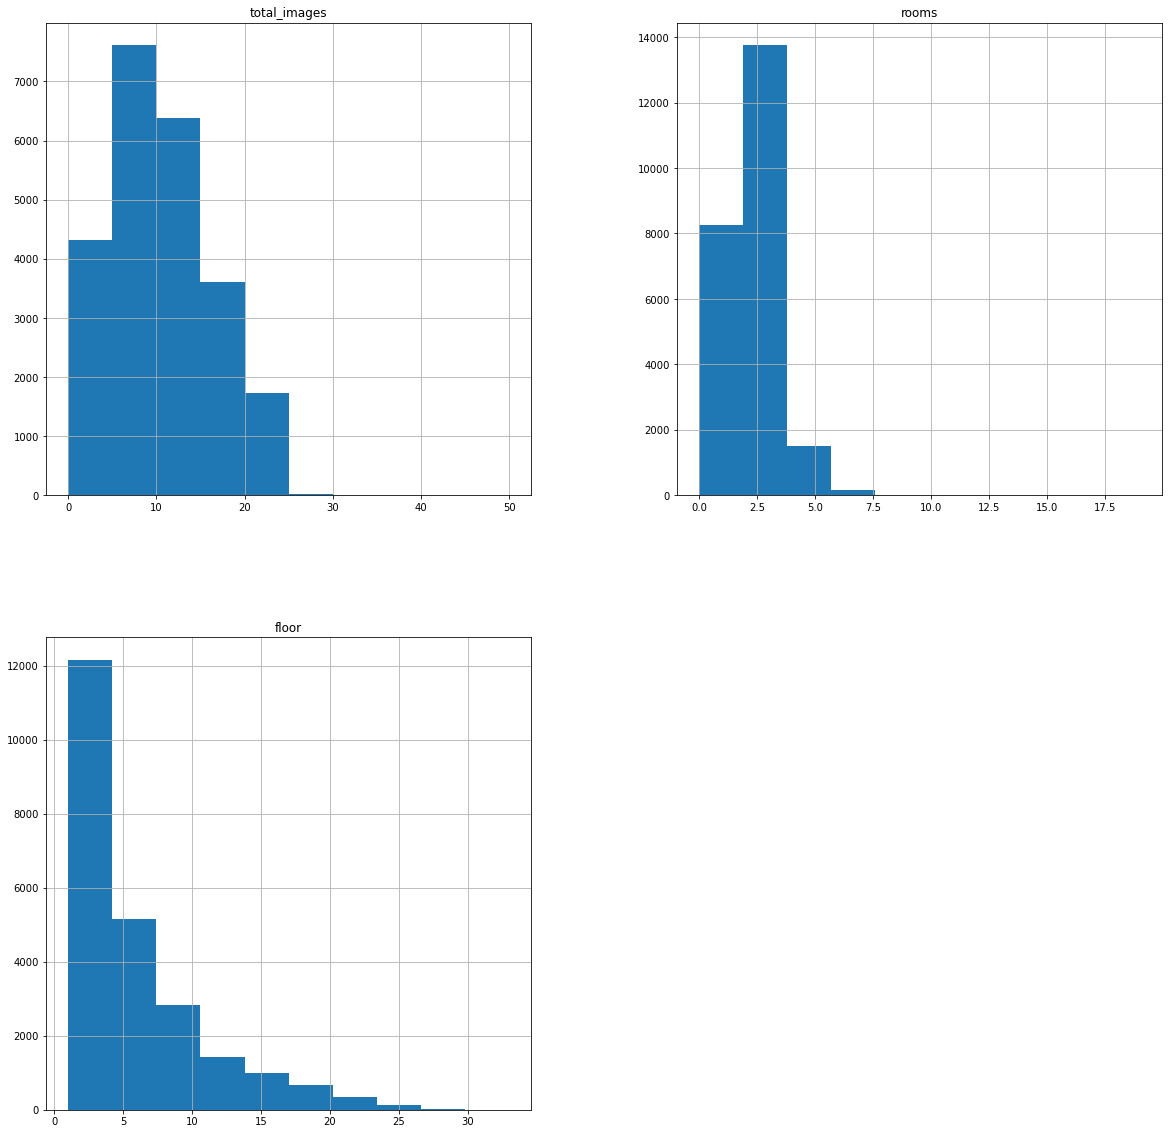

In [6]:
data.hist(figsize=(20, 20))

### Промежуточный вывод
В таблице много пропущенных значений, а так же много столбцов, для которых необходимо осуществить изменение типов данных.

### 2. Предобработка данных

In [7]:
#определение пропущенных значений
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Пропущенные значения есть в следующих столбцах:**
1. Высота потолков (ceiling_height)
2. Общая этажность (floors_total)
3. Жилая площадь (living_area)
4. Признак "апартаменты" (is_apartment)
5. Площадь кухни (kitchen_area)
6. Количество балконов (balcony)
7. Населённый пункт (locality_name)
8. Расстояние до ближайшего аэропорта (airports_nearest)
9. Расстояние до центра города (cityCenters_nearest)
10. Парки в радиусе 3 км (parks_around3000)
11. Расстояние до ближайшего парка (parks_nearest)
12. Пруды в радиусе 3 км (ponds_around3000)
13. Расстояние до ближайшего пруда (ponds_nearest)
14. Время, которое объявление "провисело на сайте" (days_exposition)

### Возможные причины появления пропусков в датасете:
1. Пользователь не указал количество балконов, так как балконы в квартире отсутствуют. 
2. В радиусе трёх километров нет парков или водоёмов, соответственно, в картографических данных нет расстояния до них. 
3. Квартира находится слишком далеко от аэропортов/центра города, чтобы картографическая система опознала один из них как ближайший (в том случае, если у неё есть уставка, например, "в радусе 50 км").
4. Для непроданных квартир невозможно посчитать время, которое объявление провисело на сайте, так как объявление ещё висит.
5. Площадь кухни может быть не указана, так как в студиях нет отдельной кухне, а в обычной квартире её могли объединить с комнатой.
6. Пользователь не ввёл данные случайно или намеренно (в случае попытки мошенничества) в поля, не отмеченные как обязательные к заполнению.

Строки, для которых не указан населённый пункт, можно удалить, так как их процент от общего датасета очень мал. <br>
Для столбцов "количество балконов", "количество парков в радиусе 3 км", "количество водоёмов в радиусе 3 км" допустимо заполнить пропуски нулями. То же самое сделано со столбцом "площадь кухни", так как процент пропусков небольшой, и пропуски могут быть обусловлены разными факторами, а заполнение медианным значением может привести к тому, что площадь кухни будет больше общей площади квартиры.<br>
Пропущенные значения в столбце "высота потолков", можно заменить медианным значением.<br>
Пропущенные значения в столбцах "этажность" и  "расстояние до центра города" можно заменить медианным значением по населённому пункту (если для каких-то групп не будет возможности посчитать медиану - заменим на медиану по всему датасету). <br>
Пропущенные значения в столбце "жилая площадь" можно заменить медианным значением по числу комнат. <br>
Расстояния до аэропорта, парков и прудов можно заполнить медианными значениями, так как это не самые важные параметры.<br>

In [8]:
#удаление строк, где не указан населённый пункт
data = data.dropna(subset = ['locality_name'])
#заполнение пропусков
data['balcony'] = data['balcony'].fillna(0) 
data['kitchen_area'] = data['kitchen_area'].fillna(0) 
data['parks_around3000'] = data['parks_around3000'].fillna(0) 
data['ponds_around3000'] = data['ponds_around3000'].fillna(0) 

In [9]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['airports_nearest'].isna(), 'airports_nearest'] = data['airports_nearest'].median()
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] = data['parks_nearest'].median()
data.loc[data['ponds_nearest'].isna(), 'ponds_nearest'] = data['ponds_nearest'].median()
data.loc[data['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = data['cityCenters_nearest'].median()

In [10]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['floors_total'].isna()), 'floors_total'] = \
    data.loc[(data['locality_name'] == t), 'floors_total'].median()

In [11]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3180
dtype: int64

### Изменение типов данных
В датасете много числовых значений, столбец с датой и временем, а так же столбец типа с логическими значениями, записанных в формате object. Для дальнейшей работы с этими данными необходимо было преобразовать их в "свои" типы.

In [13]:
#изменение типов данных
data['last_price'] = pd.to_numeric(data['last_price'])
data['ceiling_height'] = pd.to_numeric(data['ceiling_height'])
data['total_area'] = pd.to_numeric(data['total_area'])
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = pd.to_numeric(data['floors_total'])
data['living_area'] = pd.to_numeric(data['living_area'])
data['is_apartment'] = data['is_apartment'].astype('bool')
data['kitchen_area'] = pd.to_numeric(data ['kitchen_area'])
data['balcony'] = pd.to_numeric(data['balcony'])
data['airports_nearest'] = pd.to_numeric(data['airports_nearest']) 
data['cityCenters_nearest'] = pd.to_numeric(data['cityCenters_nearest']) 
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'])
data['parks_nearest'] = pd.to_numeric(data['parks_nearest']) 
data['ponds_around3000'] = pd.to_numeric(data['ponds_around3000'])
data['ponds_nearest'] = pd.to_numeric(data['ponds_nearest']) 
data['days_exposition'] = pd.to_numeric(data['days_exposition'])

### Удаление неявных дубликатов

In [14]:
display(data['locality_name'].unique().tolist())

['Санкт-Петербург',
 'посёлок Шушары',
 'городской посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'поселок городского типа Красный Бор',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'поселок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 '

In [15]:
#обработка неявных дубликатов
location_types = ['посёлок', 'городской посёлок', 'поселок городского типа', 'поселок', 'посёлок городского типа', 'коттеджный поселок', 'коттеджный посёлок']
for location in location_types:
    data['locality_name'] = data['locality_name'].str.replace(location, 'посёлок', regex=True)
    
loc_types = ['садовое товарищество', 'садовое некоммерческое товарищество']    
for location in loc_types:
    data['locality_name'] = data['locality_name'].str.replace(location, 'садовое товарищество', regex=True)

In [16]:
display(data['locality_name'].unique().tolist())

['Санкт-Петербург',
 'посёлок Шушары',
 'посёлок Янино-1',
 'посёлок Парголово',
 'посёлок Мурино',
 'Ломоносов',
 'Сертолово',
 'Петергоф',
 'Пушкин',
 'деревня Кудрово',
 'Коммунар',
 'Колпино',
 'посёлок Красный Бор',
 'Гатчина',
 'деревня Фёдоровское',
 'Выборг',
 'Кронштадт',
 'Кировск',
 'деревня Новое Девяткино',
 'посёлок Металлострой',
 'посёлок Лебяжье',
 'посёлок Сиверский',
 'посёлок Молодцово',
 'посёлок Кузьмоловский',
 'садовое товарищество Новая Ропша',
 'Павловск',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'Сестрорецк',
 'деревня Куттузи',
 'посёлок Аннино',
 'посёлок Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'посёлок Торковичи',
 'посёлок Первомайское',
 'Красное Село',
 'посёлок Понтонный',
 'Сясьстрой',
 'деревня Старая',
 'деревня Лесколово',
 'посёлок Новый Свет',
 'Сланцы',
 'село Путилово',
 'Ивангород',
 'Мурино',
 'Шлиссельбург',
 'Никольское',
 'Зеленогорск',
 'Сосновый Бор',
 'деревня Оржицы',
 'деревня Кальти

### Удаление аномальных значений
Найдём выбросы в столбцах "цена", "общая площадь", "количество комнат", "высота потолков", "жилой площади" и "этажности", так как это самые важные для нашего анализа данные.

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

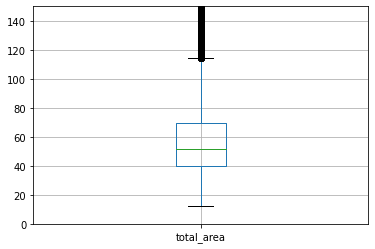

In [17]:
# построение диаграммы размаха для общей площади
data.boxplot('total_area') 
plt.ylim(0, 150)
data['total_area'].describe()

In [18]:
#удаление аномальных значений
data = data[(data['total_area'] < 118)]
data['total_area'].describe()

count    22507.000000
mean        54.602022
std         19.740061
min         12.000000
25%         39.400000
50%         50.300000
75%         66.000000
max        117.700000
Name: total_area, dtype: float64

count    22507.000000
mean         1.954414
std          0.904662
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

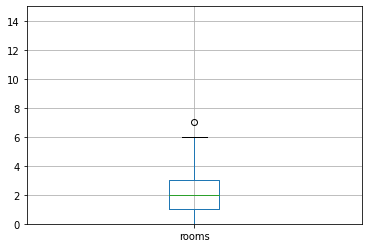

In [19]:
# построение диаграммы размаха для количества комнат
data.boxplot('rooms') 
plt.ylim(0, 15)
data['rooms'].describe()

In [20]:
#удаление аномальных значений
data = data[(data['rooms'] < 6)]
data['rooms'].describe()

count    22497.000000
mean         1.952571
std          0.900608
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

count    22497.000000
mean         2.710000
std          1.007775
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

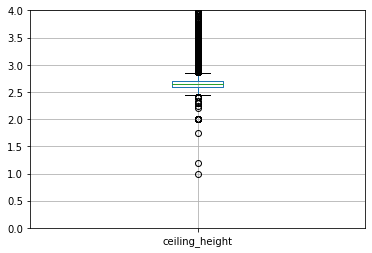

In [21]:
# построение диаграммы размаха для высоты потолков
data.boxplot('ceiling_height') 
plt.ylim(0, 4)
data['ceiling_height'].describe()

In [22]:
#удаление аномальных значений
data = data[(data['ceiling_height'] < 2.85)]
data['ceiling_height'].describe()

count    20111.000000
mean         2.628018
std          0.083884
min          1.000000
25%          2.570000
50%          2.650000
75%          2.650000
max          2.840000
Name: ceiling_height, dtype: float64

count    20111.000000
mean        11.216474
std          6.655985
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         52.000000
Name: floors_total, dtype: float64

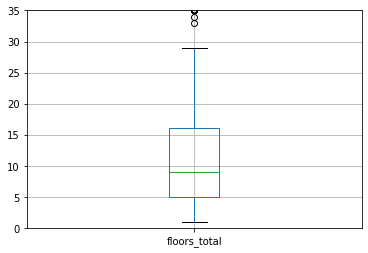

In [23]:
# построение диаграммы размаха для количества этажей
data.boxplot('floors_total') 
plt.ylim(0, 35)
data['floors_total'].describe()

In [24]:
#удаление аномальных значений
data = data[(data['floors_total'] < 29)]
data['floors_total'].describe()

count    20080.000000
mean        11.179158
std          6.591711
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

count    20080.000000
mean        29.951983
std         12.747142
min          2.000000
25%         18.000000
50%         29.000000
75%         39.000000
max         93.600000
Name: living_area, dtype: float64

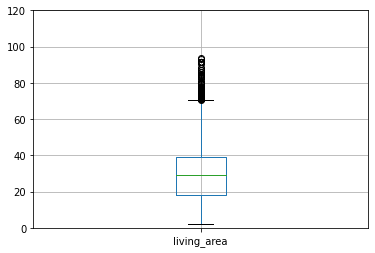

In [25]:
# построение диаграммы размаха для жилой площади
data.boxplot('living_area') 
plt.ylim(0, 120)
data['living_area'].describe()

In [26]:
#удаление аномальных значений
data = data[(data['living_area'] < 75)]
data['living_area'].describe()

count    20020.000000
mean        29.795183
std         12.435596
min          2.000000
25%         18.000000
50%         29.000000
75%         38.900000
max         74.800000
Name: living_area, dtype: float64

count    2.002000e+04
mean     4.918950e+06
std      2.861253e+06
min      1.219000e+04
25%      3.252250e+06
50%      4.300000e+06
75%      5.800000e+06
max      5.000000e+07
Name: last_price, dtype: float64

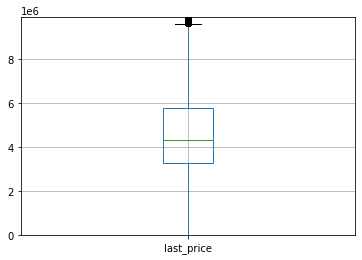

In [27]:
# построение диаграммы размаха для цены
data.boxplot('last_price') 
plt.ylim(0, 9900000)
data['last_price'].describe()

In [28]:
#удаление аномальных значений
data = data[(data['last_price'] < 8500000)]
data['last_price'].describe()

count    1.829000e+04
mean     4.275557e+06
std      1.626742e+06
min      1.219000e+04
25%      3.170000e+06
50%      4.100000e+06
75%      5.300000e+06
max      8.495000e+06
Name: last_price, dtype: float64

count    16241.000000
mean       165.410689
std        202.788958
min          1.000000
25%         42.000000
50%         88.000000
75%        209.000000
max       1580.000000
Name: days_exposition, dtype: float64

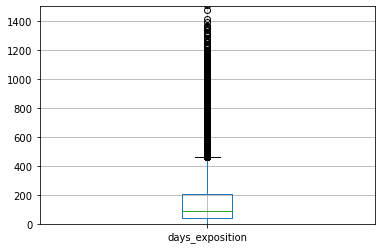

In [29]:
# построение диаграммы размаха для времени продажи квартиры
data.boxplot('days_exposition') 
plt.ylim(0, 1500)
data['days_exposition'].describe()

In [30]:
#удаление аномальных значений
data = data[(data['days_exposition'] < 465)]
data['days_exposition'].describe()

count    14892.000000
mean       116.482004
std        109.426436
min          1.000000
25%         38.000000
50%         74.000000
75%        166.000000
max        464.000000
Name: days_exposition, dtype: float64

### Промежуточный вывод
В результате предобработки были скорректированы типы данных, заполнены пропуски, а так же удалены аномальные значения. Из датасета было отфильтровано порядка 38% данных.

### 3. Посчитайте и добавьте в таблицу новые столбцы

In [31]:
#цена одного квадратного метра
data['specific_price'] = data['last_price'] / data['total_area']

In [32]:
#день недели публикации объявления
data['day_exp'] = data['first_day_exposition'].dt.dayofweek
data[['first_day_exposition', 'day_exp']]

,first_day_exposition,day_exp
1,2018-12-04,1
5,2018-09-10,0
6,2017-11-02,3
8,2018-05-23,2
9,2017-02-26,6
...,...,...
23687,2017-12-16,5
23690,2018-07-19,3
23692,2017-07-07,4
23693,2016-08-05,4


In [33]:
#месяц публикации объявления
data['month_exp'] = data['first_day_exposition'].dt.month
data[['first_day_exposition', 'month_exp']]

,first_day_exposition,month_exp
1,2018-12-04,12
5,2018-09-10,9
6,2017-11-02,11
8,2018-05-23,5
9,2017-02-26,2
...,...,...
23687,2017-12-16,12
23690,2018-07-19,7
23692,2017-07-07,7
23693,2016-08-05,8


In [34]:
#год публикации объявления
data['year_exp'] = data['first_day_exposition'].dt.year
data[['first_day_exposition', 'year_exp']]

,first_day_exposition,year_exp
1,2018-12-04,2018
5,2018-09-10,2018
6,2017-11-02,2017
8,2018-05-23,2018
9,2017-02-26,2017
...,...,...
23687,2017-12-16,2017
23690,2018-07-19,2018
23692,2017-07-07,2017
23693,2016-08-05,2016


In [35]:
def categorize_floors(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']: 
        return 'последний'
    else:
        return 'другой'

In [36]:
data['floor_type'] = data.apply(categorize_floors, axis = 1)

In [37]:
#расстояние в км до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest'].astype('int') / 1000

### Промежуточный вывод
В таблицу добавлены новые столбцы, данные из которых можно использовать на стадии исследовательского анализа данных.

### 4. Проведите исследовательский анализ данных

### Гистограммы

<AxesSubplot:>

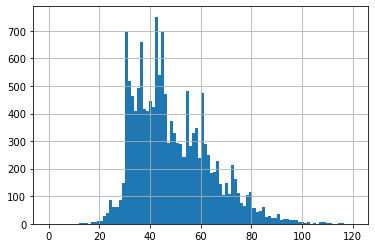

In [38]:
data['total_area'].hist(bins=100, range=(0,120))

<AxesSubplot:>

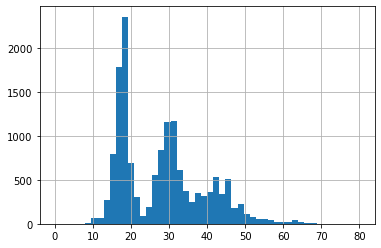

In [39]:
data['living_area'].hist(bins=50, range=(0,80))

<AxesSubplot:>

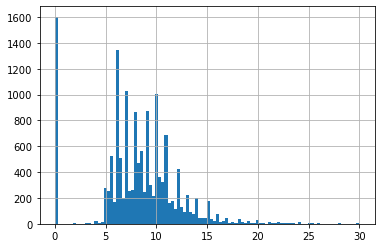

In [40]:
data['kitchen_area'].hist(bins=100, range=(0,30))

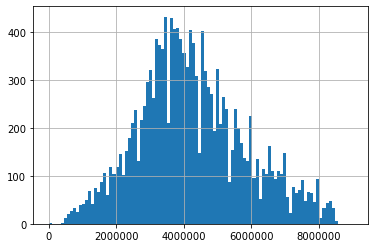

In [41]:
data['last_price'].hist(bins=100, range=(0,9000000))
plt.ticklabel_format(axis = 'x', style = 'plain')

<AxesSubplot:>

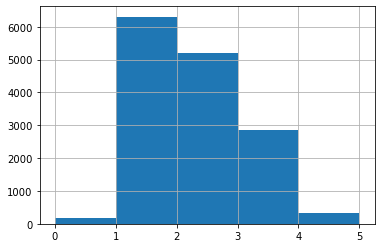

In [42]:
data['rooms'].hist(bins=5, range=(0,5))

<AxesSubplot:>

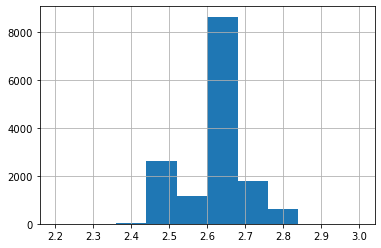

In [43]:
data['ceiling_height'].hist(bins=10, range=(2.2,3))

<AxesSubplot:>

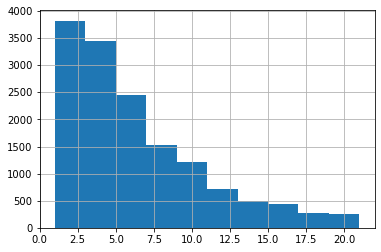

In [44]:
data['floor'].hist(bins=10, range=(1,21))

<AxesSubplot:>

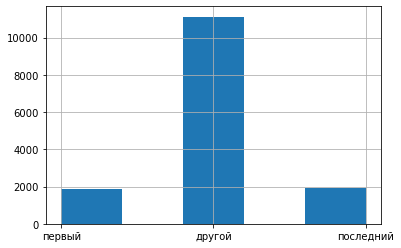

In [45]:
data['floor_type'].hist(bins=5)

<AxesSubplot:>

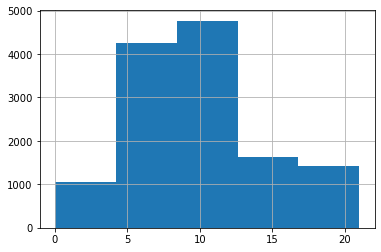

In [46]:
data['floors_total'].hist(bins=5, range=(0,21))

<AxesSubplot:>

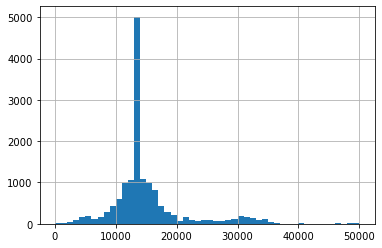

In [47]:
data['cityCenters_nearest'].hist(bins=50, range=(0,50000))

<AxesSubplot:>

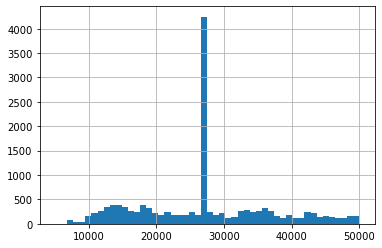

In [48]:
data['airports_nearest'].hist(bins=50, range=(5000,50000))

<AxesSubplot:>

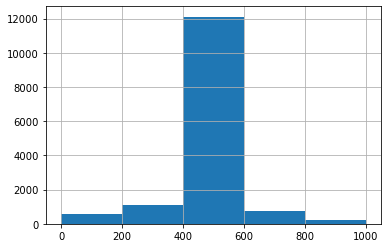

In [49]:
data['parks_nearest'].hist(bins=5, range=(0,1000))

<AxesSubplot:>

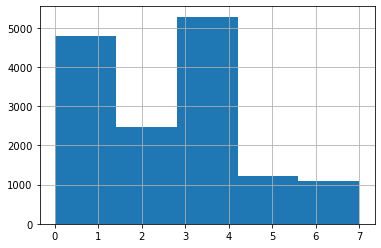

In [50]:
data['day_exp'].hist(bins=5, range=(0,7))

<AxesSubplot:>

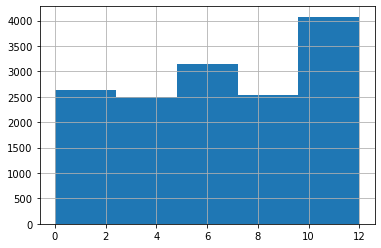

In [51]:
data['month_exp'].hist(bins=5, range=(0,12))

### Как быстро продавались квартиры

<AxesSubplot:>

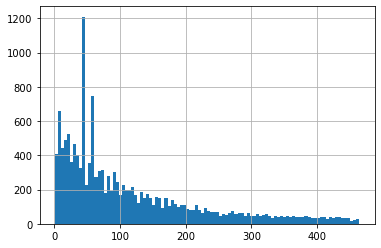

In [52]:
data['days_exposition'].hist(bins=100)

In [53]:
data['days_exposition'].mean()

116.48200376040828

In [54]:
data['days_exposition'].median()

74.0

В среднем, продажа квартиры занимает 117 дней. 
Необычайно быстрыми можно считать продажи быстрее, чем за 74 дня (первый квартиль), необычано медленными - дольше 168 дней (третий квартиль).

### Факторы, влияющие на стоимость объекта

In [55]:
pd.pivot_table(data, index=['total_area'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                       
                count       mean         sum
total_area                                  
12.0                1  2400000.0   2400000.0
13.0                2  2600000.0   5200000.0
13.2                1  1686000.0   1686000.0
14.0                1  1190000.0   1190000.0
15.0                2  1725000.0   3450000.0
...               ...        ...         ...
114.0               1  6490000.0   6490000.0
115.0               2  6720000.0  13440000.0
116.0               2  8050000.0  16100000.0
116.3               1  6500000.0   6500000.0
117.3               1  1800000.0   1800000.0

[1288 rows x 3 columns]

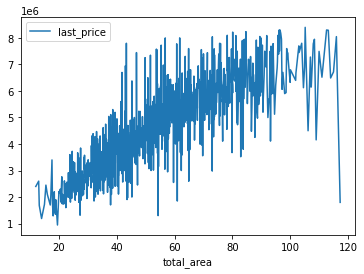

In [56]:
pd.pivot_table(data, index=['total_area'], values=['last_price'], aggfunc=('mean')).plot()
plt.ticklabel_format(axis = 'x', style = 'plain')

In [57]:
pd.pivot_table(data, index=['living_area'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                      
                 count       mean        sum
living_area                                 
2.0                  1  2330000.0  2330000.0
3.0                  1  4440000.0  4440000.0
5.0                  1  2680000.0  2680000.0
5.4                  1  6100000.0  6100000.0
6.0                  1  3799000.0  3799000.0
...                ...        ...        ...
71.5                 1  6750000.0  6750000.0
72.2                 1  6400000.0  6400000.0
73.2                 1  6500000.0  6500000.0
74.6                 1  7400000.0  7400000.0
74.8                 1  7580000.0  7580000.0

[1015 rows x 3 columns]

<AxesSubplot:xlabel='living_area'>

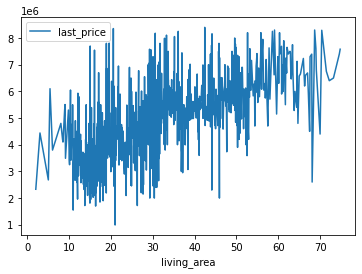

In [58]:
pd.pivot_table(data, index=['living_area'], values=['last_price'], aggfunc=('mean')).plot()

In [59]:
pd.pivot_table(data, index=['kitchen_area'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
                  count          mean           sum
kitchen_area                                       
0.00               1603  3.783591e+06  6.065097e+09
2.00                  6  2.775000e+06  1.665000e+07
2.30                  1  2.940000e+06  2.940000e+06
2.40                  1  2.200000e+06  2.200000e+06
2.89                  1  5.967734e+06  5.967734e+06
...                 ...           ...           ...
37.78                 1  6.012000e+06  6.012000e+06
40.50                 1  1.219000e+04  1.219000e+04
41.00                 1  4.200000e+06  4.200000e+06
43.20                 1  3.000000e+06  3.000000e+06
50.00                 1  5.950000e+06  5.950000e+06

[607 rows x 3 columns]

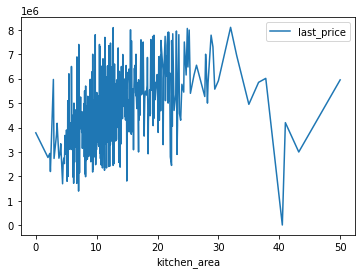

In [60]:
pd.pivot_table(data, index=['kitchen_area'], values=['last_price'], aggfunc=('mean')).plot()
plt.ticklabel_format(axis = 'x', style = 'plain')

In [61]:
pd.pivot_table(data, index=['rooms'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
           count          mean           sum
rooms                                       
0            162  2.846103e+06  4.610686e+08
1           6305  3.605271e+06  2.273123e+10
2           5215  4.486117e+06  2.339510e+10
3           2869  5.155805e+06  1.479201e+10
4            328  5.276219e+06  1.730600e+09
5             13  5.297692e+06  6.887000e+07

<AxesSubplot:xlabel='rooms'>

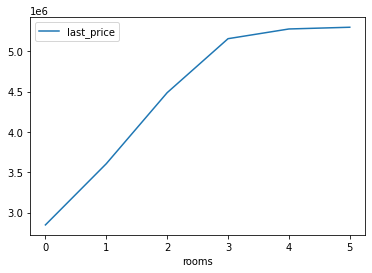

In [62]:
pd.pivot_table(data, index=['rooms'], values=['last_price'], aggfunc=('mean')).plot()

In [63]:
pd.pivot_table(data, index=['floor_type'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
                count          mean           sum
floor_type                                       
другой          11120  4.411434e+06  4.905515e+10
первый           1844  3.644331e+06  6.720147e+09
последний        1928  3.840032e+06  7.403581e+09

<AxesSubplot:xlabel='floor_type'>

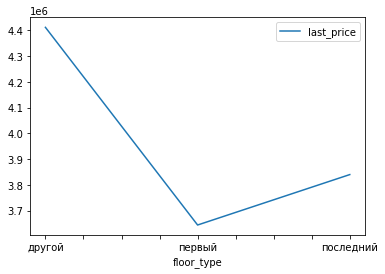

In [64]:
pd.pivot_table(data, index=['floor_type'], values=['last_price'], aggfunc=('mean')).plot()

In [65]:
pd.pivot_table(data, index=['day_exp'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
             count          mean           sum
day_exp                                       
0             2200  4.220029e+06  9.284064e+09
1             2599  4.251562e+06  1.104981e+10
2             2472  4.253865e+06  1.051555e+10
3             2685  4.256161e+06  1.142779e+10
4             2603  4.262837e+06  1.109617e+10
5             1228  4.226194e+06  5.189766e+09
6             1105  4.177126e+06  4.615724e+09

<AxesSubplot:xlabel='day_exp'>

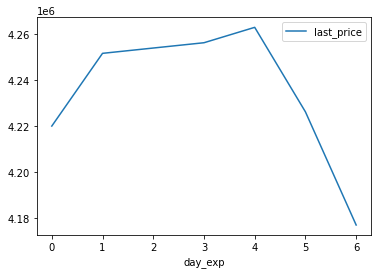

In [66]:
pd.pivot_table(data, index=['day_exp'], values=['last_price'], aggfunc=('mean')).plot()

In [67]:
pd.pivot_table(data, index=['month_exp'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
               count          mean           sum
month_exp                                       
1                949  4.260330e+06  4.043053e+09
2               1683  4.229976e+06  7.119049e+09
3               1413  4.256308e+06  6.014164e+09
4               1086  4.298145e+06  4.667785e+09
5                790  4.246236e+06  3.354527e+09
6               1220  4.136279e+06  5.046261e+09
7               1135  4.216896e+06  4.786176e+09
8               1200  4.275447e+06  5.130536e+09
9               1339  4.271576e+06  5.719640e+09
10              1468  4.224196e+06  6.201119e+09
11              1586  4.290810e+06  6.805225e+09
12              1023  4.194860e+06  4.291342e+09

<AxesSubplot:xlabel='month_exp'>

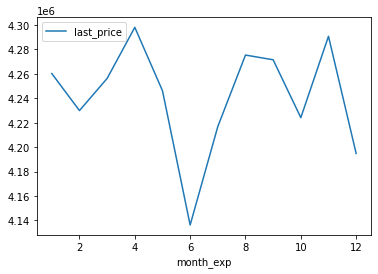

In [68]:
pd.pivot_table(data, index=['month_exp'], values=['last_price'], aggfunc=('mean')).plot()

In [69]:
pd.pivot_table(data, index=['year_exp'], values=['last_price'], aggfunc=('sum', 'count', 'mean'))

last_price                            
              count          mean           sum
year_exp                                       
2015            304  4.496633e+06  1.366976e+09
2016           1589  4.254428e+06  6.760287e+09
2017           5961  4.197751e+06  2.502280e+10
2018           6152  4.221263e+06  2.596921e+10
2019            886  4.581950e+06  4.059608e+09

<AxesSubplot:xlabel='year_exp'>

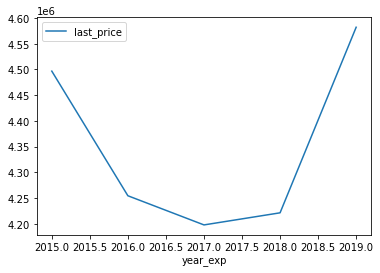

In [70]:
pd.pivot_table(data, index=['year_exp'], values=['last_price'], aggfunc=('mean')).plot()

### Расчёт коэффициентов корреляции

In [71]:
data.corr().loc['rooms','last_price']

0.39040984546483104

In [72]:
data.corr().loc['total_area','last_price']

0.6083867243347972

In [73]:
data.corr().loc['living_area','last_price']

0.4547450274929536

In [74]:
data.corr().loc['specific_price','last_price']

0.5996409430640032

In [75]:
data.corr().loc['kitchen_area','last_price']

0.33796801233585744

In [76]:
data.corr().loc['cityCenters_nearest','last_price']

-0.109540349628892

### Расчёт средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [77]:
exp = data.groupby('locality_name').agg({'total_images':'count', 'specific_price':'mean'}).rename(columns={'total_images' : 'Объявления'}).sort_values(by = 'Объявления', ascending=False).head(10)
exp

,Объявления,specific_price
locality_name,,
Санкт-Петербург,9023,101647.166357
посёлок Мурино,502,85892.132387
посёлок Шушары,375,77812.421318
Всеволожск,285,66498.338384
посёлок Парголово,278,89043.425936
Колпино,271,74616.990274
деревня Кудрово,256,92307.147554
Гатчина,224,67839.013089
Пушкин,222,98058.952883


<AxesSubplot:ylabel='locality_name'>

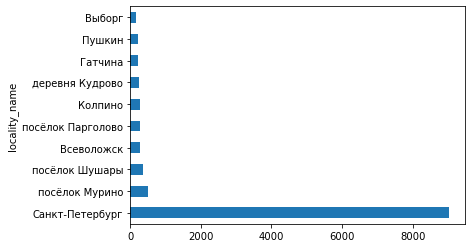

In [78]:
exp['Объявления'].plot(x = 'locality_name', y = 'specific_price', kind='barh')

Самая высокая стоимость квадратного метра в Санкт-Петербурге, самая меньшая - в Выборге.

### Cредняя цена каждого километра в Санкт-Петербурге

In [79]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km').agg({'specific_price': 'mean'}).sort_values(by = 'cityCenters_nearest_km', ascending = False)

,specific_price
cityCenters_nearest_km,
29.493,56976.744186
28.644,78225.806452
28.018,86237.335580
28.015,68478.260870
27.431,70312.500000
...,...
0.769,76086.956522
0.743,126507.936508
0.472,144957.983193


<AxesSubplot:xlabel='cityCenters_nearest_km'>

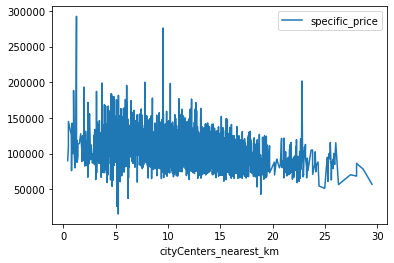

In [80]:
data[data['locality_name'] == 'Санкт-Петербург'].groupby('cityCenters_nearest_km').agg({'specific_price': 'mean'}).sort_values(by = 'cityCenters_nearest_km', ascending = False).plot()

### Промежуточный вывод

Было исследование влияние различных факторов на стоимость квартир, а так же проведены расчёты коэффициентов корреляции. <br>
Удалось выявить зависимости:
1. Общая площадь влияет на стоимость квартиры больше всего (корреляция ~60%).
2. Зависимости стоимости от количества комнат, жилой площади и площади кухни имеют такой же восходящий характер, как и зависимость от общей площади, хотя каждый из этих параметров в отдельности влияет на стоимость меньше (39%, 45% и 39% соответственно).
3. Квартиры на первом этаже стоят дешевле всех, квартиры на последнем - дороже, но самая высокая стоимость у квартир на других этажах.
4. Объявления о продаже самых дорогих квартир выкладывали по пятницам, самых дешевых - по воскресеньям.
5. Объявления о продаже самых дорогих квартир выкладывали в апреле и ноябре, самых дешевых - в июне.
6. В 2016 году наблюдался спад цен на квартиры с минимумом в начале 2017 года, после наблюдается устойчивый рост, и цены 2019 года превосходят цены 2015.
7. Корреляция между стоимостью квартир и их удалённостью от центра города/посёлка имеет отрицательное значение, так как с увеличением расстояния стоимость снижается.
8. Из 10 городов с наибольшим количеством объявлений о продаже самая высокая стоимость квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.
9. По мере удаления от центра Санкт-Петербурга стоимость квадратного метра снижается (всплески, скорее всего, обусловлены другими параметрами, например, хорошим ремонтом или большой площадью). 

### 5. Общий вывод

Проведено исследование данных объявлений о продаже квартир, чтобы выявить зависимость стоимость квартир от различных факторов. Результаты анализа можно использовать для создания автоматизированной системы оценки объявлений, которая будет ослеживать аномалии и выявлять угрозы мошеннической деятельности. <br>

На основе графиков и расчётов корреляции удалось выявить зависимости:
1. Самое значительное влияние на цену квартиры оказывает её общая площадь (корреляция составила 60%). 
2. Соответственно, на рост цены влияет и увеличение параметров  "количество комнат", "жилая площадь" и "площадь кухни" (39%, 45% и 39% соответственно). 
3. Самые дешевые квартиры располагаются на первых этажах. 
4. Стоимость квартир на последних этажах выше, чем у квартир на первом этаже, но значительно уступает стоимости квартир на других этажах.
5. Объявления о продаже самых дешёвых квартир чаще всего выкладывали в пятницу, самых дорогих - в воскресенье.
6. Объявления о продаже самых дешёвых квартир чаще всего выкладывали в июне, самых дорогих - в апреле и ноябре.
7. В 2016 году начался спад цен на квартиры, но уже в 2017 году цены снова начали расти, и уже в 2019 году превзошли показатели за предшествующий снижению 2015 год.
8. На стоимость квартир так же влияет их удалённость от центра города. В данном случае корреляция отрицательная (-11%), поскольку чем больше расстояние от квартиры до центра города, тем она дешевле.
9. Среди десяти городов, в которых больше всего объявлений, самая высокая стоимость квадратного метра в квартирах, расположенныъ в Санкт-Петербурге, наименьшая - в Выьорге.
10. По мере удаления от центра Санкт-Петербурга стоимость квадратного метра снижается (всплески, скорее всего, обусловлены другими параметрами, например, хорошим ремонтом или большой площадью). 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод